# IMAGENET DATASET TRAINED ON RESNET ARCHITECTURE

<img src="https://i2.wp.com/www.adeveloperdiary.com/wp-content/uploads/2019/09/How-to-prepare-Imagenet-dataset-for-Image-Classification-adeveloperdiary.com-7.jpg?resize=700%2C300&ssl=1" width='700' height='500' />

## Description:
***In this project the Imagenet dataset used in Imagenet challenge with 100 classes is trained and tested using one of the recently most accurate architecture *ResNet152V2* architecture in different ways.Project is diveded into 4 sections:***

 **1. Import libraries and download dataset**
 
 **2. Preprocess data**
 
 **3. Train model**
 
 **4. Test annd deployment**
 

### Section 1

In [1]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 5.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install tqdm


[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [12]:
import tensorflow as tf 
from tensorflow.keras.applications import ResNet50 
import numpy as np
import tensorflow_datasets as tfds
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import random
from glob import glob
from keras.models import *
from keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array,array_to_img
from IPython.display import display
from PIL import Image

In [8]:
mapping_path = '/kaggle/input/imagenet-object-localization-challenge/LOC_synset_mapping.txt'

# Creating of mapping dictionaries to get the image classes

class_mapping_dict = {}
class_mapping_dict_number = {}
mapping_class_to_number = {}
mapping_number_to_class = {}
i = 0
for line in open(mapping_path):
    class_mapping_dict[line[:9].strip()] = line[9:].strip()
    class_mapping_dict_number[i] = line[9:].strip()
    mapping_class_to_number[line[:9].strip()] = i
    mapping_number_to_class[i] = line[:9].strip()
    i+=1
train_path = '/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/train'

# Creation of dataset_array and true_classes

dataset_array = []
true_classes = []
images_array = []
for train_class in tqdm(os.listdir(train_path)):
    i = 0
    for el in os.listdir(train_path + '/' + train_class):
        if i < 10:
            path = train_path + '/' + train_class + '/' + el
            image = load_img(path,target_size=(224,224,3))
            image_array = img_to_array(image).astype(np.uint8)
            images_array.append(image_array)
            true_class = class_mapping_dict[path.split('/')[-2]]
            true_classes.append(true_class)
            i+=1
        else:
            break
images_array = np.array(images_array)
true_classes = np.array(true_classes)
print('Preprocessing in progress')
dataset_array = preprocess_input(images_array)
print('FINISH')

100%|██████████| 1000/1000 [00:34<00:00, 29.32it/s]


Preprocessing in progress
FINISH


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


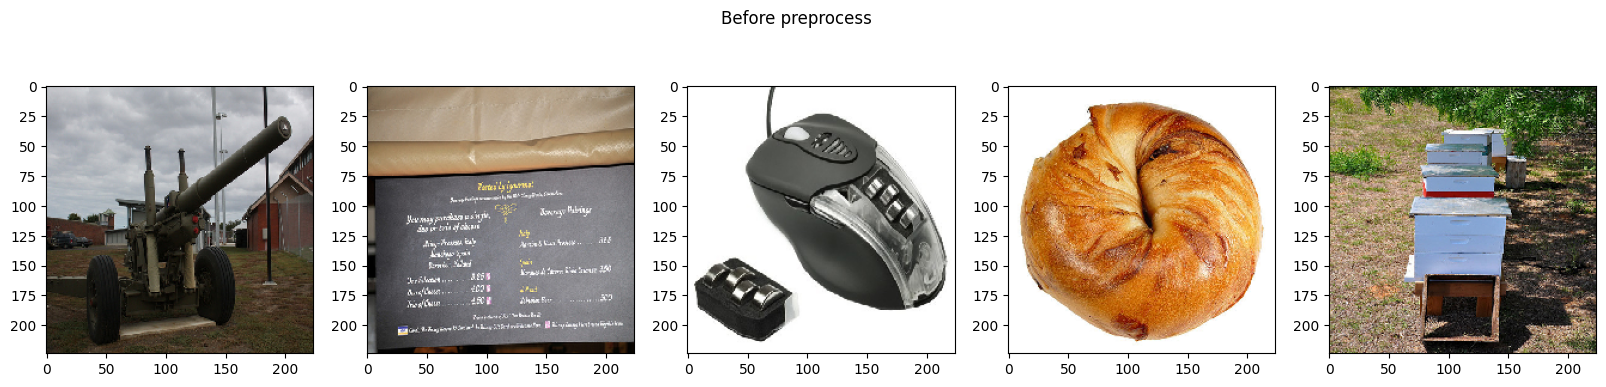

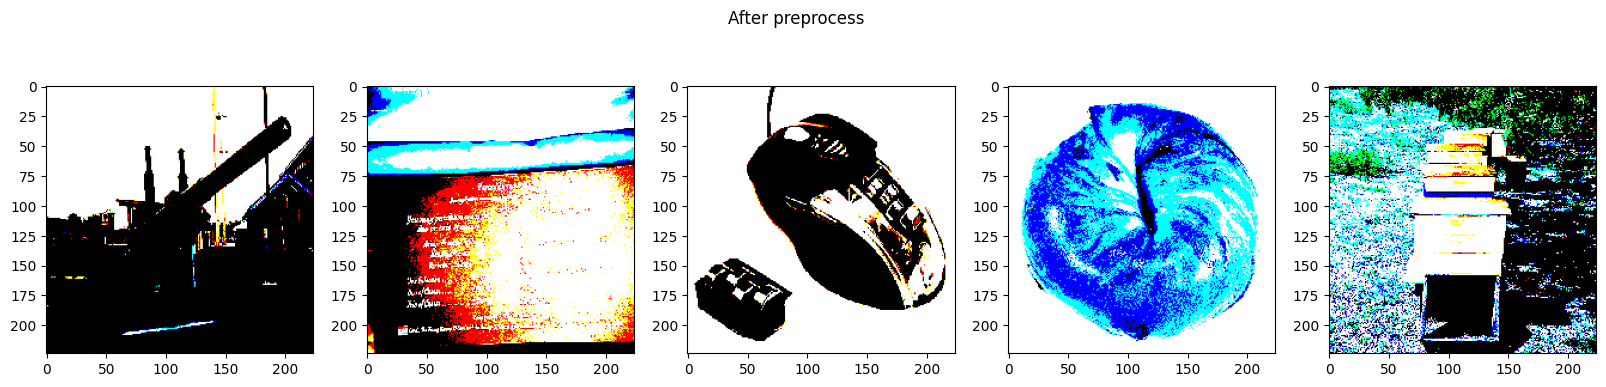

In [5]:
rand_indices = random.sample(range(0, 1000),5)
plt.figure(figsize=(20, 20))
plt.suptitle('Before preprocess',x = 0.5,y = 0.6)
for i in range(5):
    ax = plt.subplot(1,5,i+1)
    ax.imshow(images_array[rand_indices[i]])
plt.figure(figsize=(20, 20))
plt.suptitle('After preprocess',x = 0.5,y = 0.6)
for i in range(5):
    ax = plt.subplot(1,5,i+1)
    ax.imshow(dataset_array[rand_indices[i]])

# Model building

 - ResNet152V2 - is a very deep neural network with 152 layers, making it one of the largest versions of the ResNet family.

![](https://github.com/Mukhriddin19980901/Imagenet_dataset/blob/main/images/resnet152v2.png?raw=true)

In [13]:
model_resnet  = ResNet50(weights='imagenet',include_top=True, input_shape=(224,224,3))
model_resnet.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

## Model check()

In [14]:
classes = 1000

print('Prediction in progress')
predictions_array = model_resnet.predict(dataset_array[:classes])
print('Predicted')

predict_classes = []

for i in tqdm(range(classes)):
    arg_max = predictions_array[i].argmax()
    predict_class = class_mapping_dict_number[arg_max]
    predict_classes.append(predict_class)
    
predict_classes = np.array(predict_classes)

Prediction in progress
32/32 [==============================] - 20s 601ms/step
Predicted


100%|██████████| 1000/1000 [00:00<00:00, 344812.89it/s]


# Predictions 

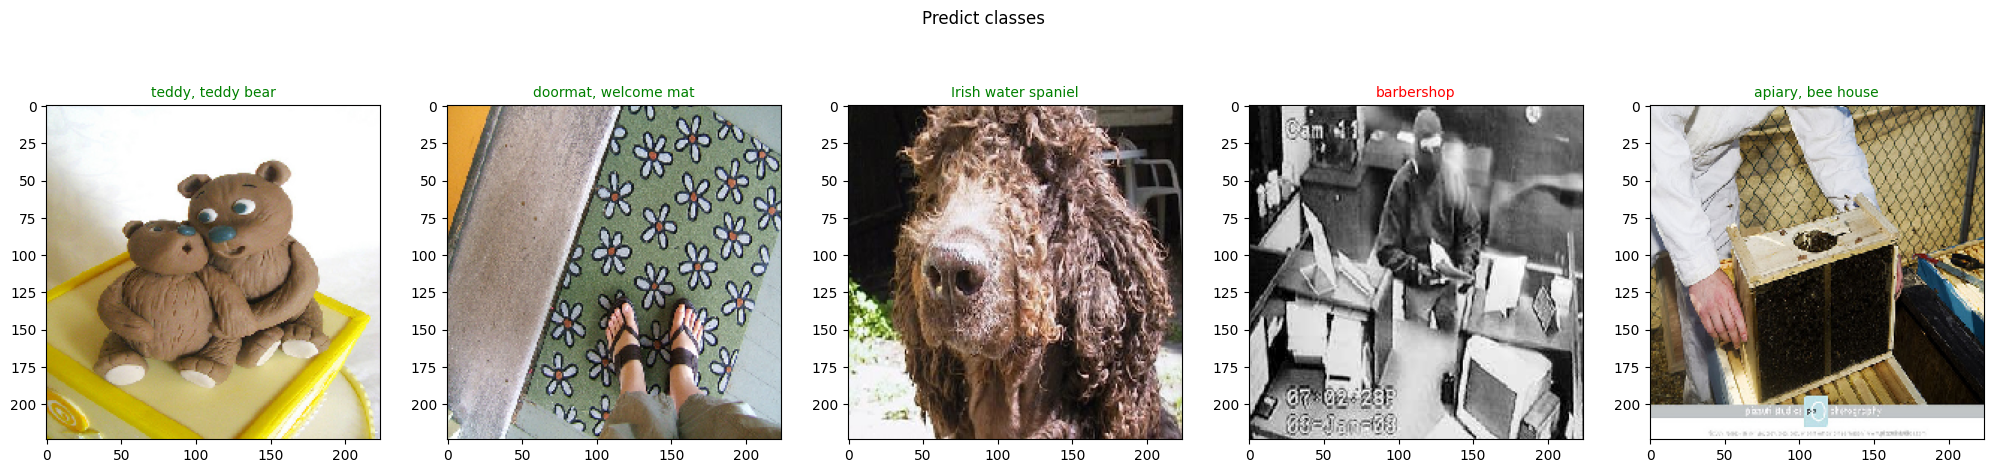

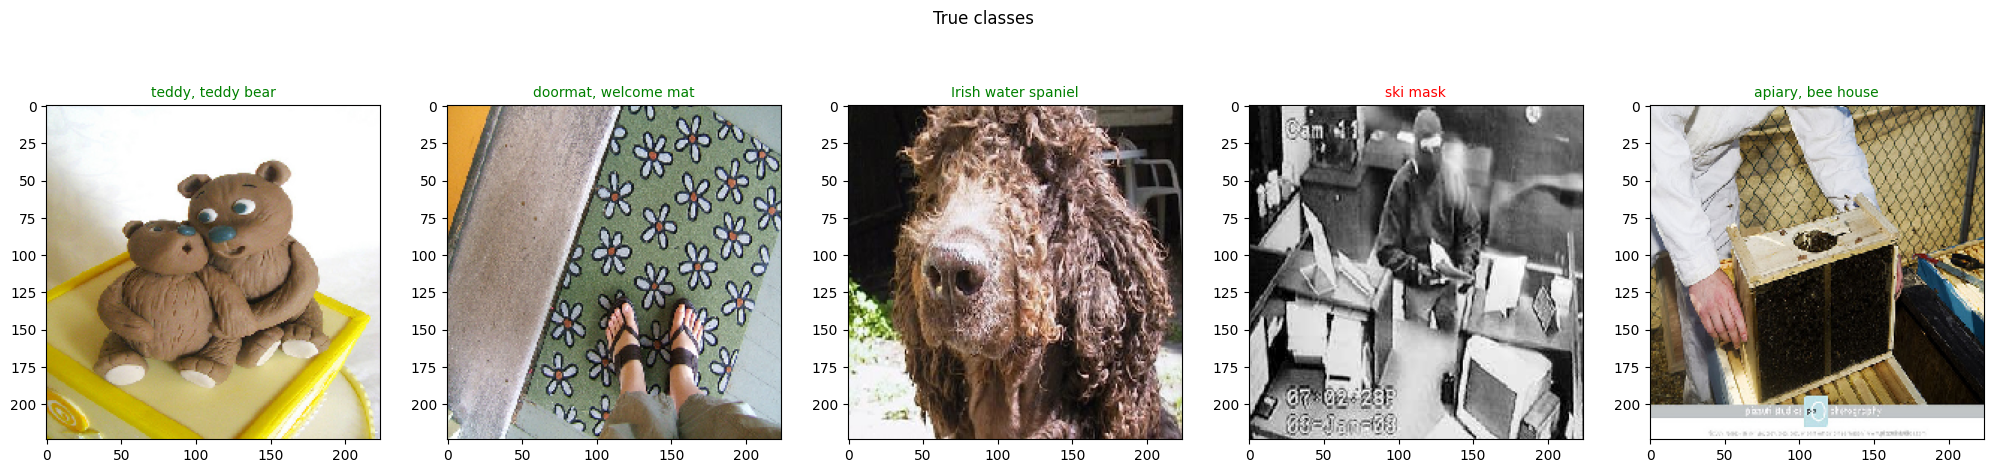

In [16]:
random_index = random.sample(range(0, classes), 5)

plt.figure(figsize=(25, 25))
plt.suptitle('Predict classes', x = 0.5, y = 0.6)
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    ax.imshow(images_array[random_index[i]])
    if predict_classes[random_index[i]] == true_classes[random_index[i]]:
        plt.title(predict_classes[random_index[i]], color='green', size=10)
    else:
        plt.title(predict_classes[random_index[i]], color='red', size=10)
plt.figure(figsize=(25, 25))
plt.suptitle('True classes', x = 0.5, y = 0.6)
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    ax.imshow(images_array[random_index[i]])
    if predict_classes[random_index[i]] == true_classes[random_index[i]]:
        plt.title(true_classes[random_index[i]], color='green', size=10)
    else:
        plt.title(true_classes[random_index[i]], color='red', size=10)

In [19]:
accuracy = 0
for i in range(classes):
    if predict_classes[i] == true_classes[i]:
        accuracy+=1
accuracy /= classes
print('accuracy : ' + str(accuracy))

accuracy : 0.792


### **The training of model without any changes to the architecture shows that accuracy rate *79%*   which is a little bit high but not enought for deploying so I am going to try model transfer learning and compare both sides.**  